# <u>Housing Data</u>

by Atikant Negi (19253717)

<u><b>Housing data</b></u><br>
Goal: put together Python code that applies a cross-validated \(k\)-nearest neighbour model from the house price data, and produces the following:
<ul>
    <li>	A 3-D plot of the house price for average floor area.</li>
<li>	A 3-D plot of the house price for floor areas of 75 square metres.</li>
<li>	A 3-D plot of the house price for floor areas of 125 square meters.</li>
</ul>
    <u><b>About the data:</b></u><br>
    The data consist of 5 columns and 1405 rows. The columns are as follows:<br>
    1. ID      : The row identifier.<br>
    2. East    : The number that tells about the location of the house in the east side.<br>
    3. North   : The number that tells about the location in the east side.<br>
    4. Fl_area : The area of the house .<br>
    5. Price   : The price of the house.<br>
    <br>
    <u><b>The steps taken to acomplish the goal:</b></u><br>
    1. Reading in the data.<br>
    2. Pre-process the data (Scaling the data).<br>
    3. Creating a k-nearest neighbor model and checking the accuracy of the method using the hold out.<br>
    4. Creating a k-nearest neighbor model and checking  the accuracy using cross-validation.<br>
    5. Tuning hyper-parameters (using grid -search) and using the same parameters to train the model.<br>
    6. Creating a data set for creating plots as asked in the question.<br>
    7. Creating a pipeline for scaling the 3 -dimensional data and predicting the price for the house.<br>
    8. creating plots.
    

#### Importing numpy and Pandas 

In [1]:
import numpy as np
import pandas as pd

<b><u>Numpy:</u></b> <br>
NumPy is an open-source numerical Python library. It is mainly used to work with arrays .NumPy consist of a variety of  multi-dimensional array and matrix data structures. It can be used to perform a number of mathematical operations on arrays such as trigonometric, statistical, and algebraic routines.<br>
<b><u>Pandas:</u></b> <br>
Pandas is an open source Python library that is mostly used for data science, analytics and machine learning problems.Pandas is  used for data analytics. Pandas allows importing and exporting data from file formats such as  JSONs, CSVs, SQL, Xlsx. Pandas allows various data manipulation operations such as merging, reshaping, selecting, as well as data cleaning, and data wrangling features which will be used in this assignment.

#### Reading the data

In [2]:
hp = pd.read_csv('hpdemo.csv')

In [3]:
hp.head

<bound method NDFrame.head of         ID    east   north   price  fl_area
0        1  523800  179700  107000       50
1        2  533200  170900   55500       66
2        3  514600  175800  103000       90
3        4  516000  171000  187000      125
4        5  533700  169200   43000       50
...    ...     ...     ...     ...      ...
1400  1401  515600  173100   68500       44
1401  1402  513200  186500   58500       59
1402  1403  542900  189500  247000      185
1403  1404  524900  185300  153000       96
1404  1405  522000  185400  146250      111

[1405 rows x 5 columns]>

we can see that the data has 1405 row and 5 columns. where the price is the response variable and the east and north are the predictor variables.

#### Checking the variance 

In [4]:
hp.var()

ID         1.646192e+05
east       1.219227e+08
north      7.401013e+07
price      5.859457e+09
fl_area    1.355557e+03
dtype: float64

The variance is not constant among the columns so we would try rescaling the data using StandardScaler.

#### Pre-processing the data

In [5]:
from sklearn.preprocessing import StandardScaler
predictor_scaler = StandardScaler()
predictor_scaler.fit(hp[['east','north','fl_area']])
X = predictor_scaler.transform(hp[['east','north','fl_area']])
y= hp[['price']]/1000.0

Scaling and standardizing can help features arrive in more digestible form for these algorithms.Also in various learning models, scaling and standardizing help is converging the data faster.

#### Creating a model without cross validation.

In [6]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

The data has been split into 20% as test data and 80% as the training data.

In [7]:
from sklearn.neighbors import KNeighborsRegressor as KNN
knnWoCross = KNN(n_neighbors=8,weights='uniform',p=2)
knnWoCross.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=8)

Here we have initialized an object od K-neighbor Regressor that would be trained and then used to predict the house price. <br>
Creating a  k-nearest neighbor object with parameters 8 neighbors which means that a new data will be predicted by majority from the 8 nearest points. <br>
weights has been chosen as uniform and p has been chosen as 2. Here value of p could be 1 (Manhattan distance) or 2 (eucledian distance).

In [8]:
# making prediction on the test data.
knnWoCross.predict(X_test)[0:10]

array([[ 79.9375  ],
       [132.93125 ],
       [ 97.35625 ],
       [ 99.2125  ],
       [218.4375  ],
       [140.425375],
       [ 81.6875  ],
       [149.375   ],
       [ 83.42625 ],
       [ 98.8125  ]])

Here we have the first 10 predicted prices of the test data.

In [9]:
#check accuracy of our model on the test data
knnWoCross.score(X_test, y_test)

0.5124737779978252

The accuracy of the model comes out to be 51.24%. So we would be able to predict the house price with an accuracy upto 51.24% using this model.

#### Cross-validation set-up

In [10]:
from sklearn.model_selection import cross_val_score
regressor = KNN(n_neighbors=8,weights='uniform',p=2)
#train model with cv of 4 
cv_scores = cross_val_score(regressor, X, y, cv=4)
#print each cross-validation score ie. accuracy and average their average
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.68282197 0.72411958 0.61731461 0.63211262]
cv_scores mean:0.6640921959364201


<b><u>Cross-validation:</u></b> Cross-validation is a model validation techniques for assessing how the results of a statistical analysis will generalize to an independent data set. Sometimes called rotation estimation or out-of-sample testing. <br>
Here we have divided the data set into 4 cross-validation sets and the model would be trained & tested 4 separate times so that each of the set would be the test set. Here the scores for the four sets 0.68282197 0.72411958 0.61731461 0.63211262 and the mean of all the scores comes out to be 66.40% which is way higher than the hold-out process we did earlier with a score of 51.24% .

#### Tuning hyper-parameters 

In [11]:
from sklearn.model_selection import GridSearchCV
optimal_nn = GridSearchCV(
    estimator = KNN(),
    param_grid = {
        'n_neighbors':range(1,50),
        'weights':['uniform','distance'],
        'p':[1,2]},
cv=4)
optimal_nn.fit(X,y)

GridSearchCV(cv=4, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50), 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

<b><u>GridSearchCv</u></b>: GridSearchCV is a function built in Scikit-learn's model_selection package. This function helps to iterate through predefined hyperparameters and fit your model on your training set. Thus we are able to tune our hyperparameters and come up with the opitmal setting to produce a more accurate model.

In [12]:
#check top performing n_neighbors value
optimal_nn.best_params_

{'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}

The best parameters for the model and the data are as neighbors =9 , weights= uniform and p=1.

In [13]:
#check mean score for the top performing value of n_neighbors
optimal_nn.best_score_

0.6798574956037022

The accuracy of the model with optimal parameters comes out to be 67.98% ~ 68 %. 

In [14]:
optimal_regressor = KNN(n_neighbors=9,weights='uniform',p=1)
optimal_cv_scores = cross_val_score(optimal_regressor, X, y, cv=4)
#each cross-validation score ie. accuracy and average their average
print(optimal_cv_scores)
print('cv_scores mean:{}'.format(np.mean(optimal_cv_scores)))

[0.69036939 0.75088657 0.60933686 0.66883717]
cv_scores mean:0.6798574956037022


#### Creating a data set for creating plots 

In [15]:
# Creating a dataset with east and north with 200 equi-spaced values from the minimum and maximum values in each of the columns.
mesh_east, mesh_north, = np.meshgrid(
    np.linspace(min(hp['east']),max(hp['east']),200),
    np.linspace(min(hp['north']),max(hp['north']),200)
)

In the above code we have created 200 equi-spaced values from the minimum and maximum values in each of the columns of east and north. This is done to so as to avoid extrapolation.<br>
<b><u>meshgrid:</u></b>: Meshgrid is a function of NUMPY which is used to create a rectangular grid out of two given 1 dimensional. This is represented as the Cartesian indexing or Matrix indexing. <br>
<b><u>linspace:</u></b>: linspace is a function of Numpy which is used to create evenly spaced numbers over a specified interval. <br>

#### Creating a Pipeline 

In [16]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('zscores',StandardScaler()),('NNreg',KNN(n_neighbors=9,weights='uniform',p=1))])
pipe.fit(hp[['east','north','fl_area']],hp[['price']]/1000.0)

Pipeline(steps=[('zscores', StandardScaler()),
                ('NNreg', KNeighborsRegressor(n_neighbors=9, p=1))])

Pipeline helps to automate machine learning workflows. Pipelines work by transforming the linear sequence of data and then chain the data with other process in the model so that the repeated manual work can be cut short. Here we have used the pipline to scale the data and then chain it to the optimal k nearest neighbour so that the data the pipline object takes care of the manual process and can just be used to predict the house price using the east , north and the fl_area components. 

#### Question 1

In [17]:
# for creating  a 3d plot with average floor size .
mesh_floor_area = np.zeros_like(mesh_east)
mesh_floor_area[:,:]=np.mean(hp['fl_area']/1000.0)
q1=np.array([mesh_east.ravel(),
    mesh_north.ravel(),mesh_floor_area.ravel()]).T

we have using the same 200 equi-spaced data for east and north and adding the fl_area data to be the average floor area of the data provided in the initial data set.

In [18]:
hp_pred = pipe.predict(q1)
hp_mesh = hp_pred.reshape(mesh_east.shape)

hp_pred consist of the predicted house prices for the matrix which is reshaped like the dimension of the predictor variables.

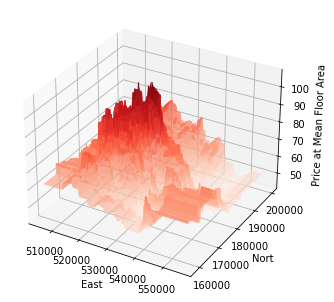

In [19]:
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D

fig = pl.figure()
ax = Axes3D(fig)
ax.plot_surface(mesh_east, mesh_north, hp_mesh, rstride=1, cstride=1, cmap='Reds',lw=0.01)
ax.set_xlabel('East')
ax.set_ylabel('Nort')
ax.set_zlabel('Price at Mean Floor Area')
pl.show()

In [20]:
#Maximum price for mean floor area
print(max(hp_pred))
#Minimum price for mean floor area
print(min(hp_pred))

[108.22222222]
[42.11055556]


The maximum price for the mean floor area house comes out to be 108,000. <br>
The minimum price for the mean floor area house comes out to be 42,000.<br>

#### Question 2

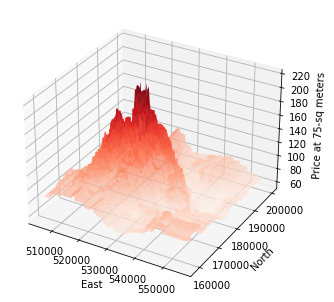

In [21]:
# for creating  a 3d plot with floor size 75.
mesh_floor_area = np.zeros_like(mesh_east)
mesh_floor_area[:,:]=75.0
q2=np.array([mesh_east.ravel(),
    mesh_north.ravel(),mesh_floor_area.ravel()]).T


hp_pred = pipe.predict(q2)

hp_mesh = hp_pred.reshape(mesh_east.shape)

import pylab as pl
from mpl_toolkits.mplot3d import Axes3D

fig = pl.figure()
ax = Axes3D(fig)
ax.plot_surface(mesh_east, mesh_north, hp_mesh, rstride=1, cstride=1, cmap='Reds',lw=0.01)
ax.set_xlabel('East')
ax.set_ylabel('North')
ax.set_zlabel('Price at 75-sq meters')
pl.show()

In [22]:
#Maximum price for 75-sq meters area house
print(max(hp_pred))
#Minimum price for 75-sq meters area house
print(min(hp_pred))

[222.18144444]
[53.13777778]


The maximum price for the 75 sq-meters area house comes out to be 222,000. <br>
The minimum price for the 75 sq-meters area house out to be 53,000.<br>

#### Question 3

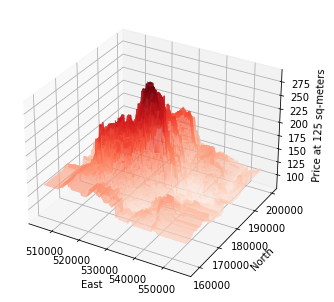

In [23]:
# for creating  a 3d plot with floor size 125 .
mesh_floor_area = np.zeros_like(mesh_east)
mesh_floor_area[:,:]=125.0
q3=np.array([mesh_east.ravel(),
    mesh_north.ravel(),mesh_floor_area.ravel()]).T


hp_pred = pipe.predict(q3)

hp_mesh = hp_pred.reshape(mesh_east.shape)

import pylab as pl
from mpl_toolkits.mplot3d import Axes3D

fig = pl.figure()
ax = Axes3D(fig)
ax.plot_surface(mesh_east, mesh_north, hp_mesh, rstride=1, cstride=1, cmap='Reds',lw=0.01)
ax.set_xlabel('East')
ax.set_ylabel('North')
ax.set_zlabel('Price at 125 sq-meters')
pl.show()

In [24]:
#Maximum price for 125-sq meters area house
print(max(hp_pred))
#Minimum price for 125-sq meters area house
print(min(hp_pred))

[292.66666667]
[77.77666667]


The maximum price for the 125 sq-meters area house comes out to be 292,000.<br>
The minimum price for the 125 sq-meters area house out to be 77,000.<br>

#### Final Observation

The 3D plot represented in the above sections predict the house price for the given values at each east and north location with respect to the floor area.The intensity of the colour represents the price of the location. Hence, darker the colour the higher will be the price and the lighter the colour the lower price of the location. we can sum up the observation of the 3d plots as follow :<br><ul>
<li>The maximum price for the mean floor area house comes out to be 108,000. <br></li>
<li>The minimum price for the mean floor area house comes out to be 42,000.<br></li>
<li>The maximum price for the 75 sq-meters area house comes out to be 222,000. <br></li>
<li>The minimum price for the 75 sq-meters area house out to be 53,000.<br></li>
<li>The maximum price for the 125 sq-meters area house comes out to be 292,000.<br></li>
<li>The minimum price for the 125 sq-meters area house out to be 77,000.<br></li>
<li>The peak price is  at the centre of every plot .<br></li>
<li>The price of the house is forectly proportional to the area of the house. <br></li>
<li>House prices decreases for all house sizes as you move further away in any direction from the central peak location but there is slight variation before the steady decrease in some regions in the periphery.<br></li>
</ul>